In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 200)
df = pd.read_csv("C:\\Users\\Laptops Garage W11\\Downloads\\nifty_500_quarterly_results.csv")
df

,name,NSE_code,BSE_code,sector,industry,revenue,operating_expenses,operating_profit,operating_profit_margin,depreciation,interest,profit_before_tax,tax,net_profit,EPS,profit_TTM,EPS_TTM
0,3M India Ltd.,3MINDIA,523395,GENERAL INDUSTRIALS,INDUSTRIAL MACHINERY,"1,057",847.4,192.1,18.48%,12.9,0.7,195.9,49.8,146.1,129.7,535.9,475.7
1,ACC Ltd.,ACC,500410,CEMENT AND CONSTRUCTION,CEMENT & CEMENT PRODUCTS,"4,644.8","3,885.4",549.3,12.39%,212.8,28.9,517.7,131.5,387.9,20.7,"1,202.7",64.0
2,AIA Engineering Ltd.,AIAENG,532683,GENERAL INDUSTRIALS,OTHER INDUSTRIAL GOODS,"1,357.1",912.7,382.1,29.51%,24.5,7.4,412.5,88.4,323.1,34.3,"1,216.1",128.9
3,APL Apollo Tubes Ltd.,APLAPOLLO,533758,METALS & MINING,IRON & STEEL PRODUCTS,"4,650","4,305.4",325,7.02%,41.3,26.6,276.7,73.8,202.9,7.3,767.5,27.7
4,Au Small Finance Bank Ltd.,AUBANK,540611,BANKING AND FINANCE,BANKS,"2,956.5","1,026.7",647.7,25.59%,0,"1,282.1",533.4,131.5,401.8,6.0,"1,606.2",24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Allcargo Logistics Ltd.,ALLCARGO,532749,TRANSPORTATION,TRANSPORTATION - LOGISTICS,"3,336.3","3,188.8",118,3.57%,106.7,36.7,14.2,1.3,21.8,0.9,361.9,14.7
497,Sheela Foam Ltd.,SFL,540203,DIVERSIFIED CONSUMER SERVICES,FURNITURE-FURNISHING-PAINTS,637.6,547,66.2,10.80%,21.9,8.6,60.2,15.6,44,4.5,192.4,17.7
498,Alok Industries Ltd.,ALOKINDS,521070,TEXTILES APPARELS & ACCESSORIES,TEXTILES,"1,369.3","1,323.1",35.9,2.64%,78.6,142.2,-174.6,0,-174.8,-0.3,-948.4,-1.9
499,Minda Corporation Ltd.,MINDACORP,538962,AUTOMOBILES & AUTO COMPONENTS,AUTO PARTS & EQUIPMENT,"1,197.9","1,064.5",131.3,10.98%,41.4,14.9,77,18.7,58.8,2.5,278.2,11.6


In [2]:
df.isna().sum()

name                       0
NSE_code                   0
BSE_code                   0
sector                     0
industry                   0
revenue                    1
operating_expenses         1
operating_profit           1
operating_profit_margin    1
depreciation               1
interest                   1
profit_before_tax          1
tax                        1
net_profit                 1
EPS                        1
profit_TTM                 3
EPS_TTM                    3
dtype: int64

In [3]:
# drops all of the NA values and saves it 
df.dropna(inplace=True)

In [4]:
df.isnull().sum()

name                       0
NSE_code                   0
BSE_code                   0
sector                     0
industry                   0
revenue                    0
operating_expenses         0
operating_profit           0
operating_profit_margin    0
depreciation               0
interest                   0
profit_before_tax          0
tax                        0
net_profit                 0
EPS                        0
profit_TTM                 0
EPS_TTM                    0
dtype: int64

In [5]:
df.dtypes

name                        object
NSE_code                    object
BSE_code                    object
sector                      object
industry                    object
revenue                     object
operating_expenses          object
operating_profit            object
operating_profit_margin     object
depreciation                object
interest                    object
profit_before_tax           object
tax                         object
net_profit                  object
EPS                        float64
profit_TTM                  object
EPS_TTM                    float64
dtype: object

We observe that the columns **revenue,operating_expenses,operating_profit,operating_profit_margin,depreciation,
interest,profit_before_tax,tax,net_profit,profit_TTM** are of **object data-type** where as it should be 
of **float** or a **integer** data-type.

In [6]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].replace({',': '','%': ''}, regex=True)
        df[col] = pd.to_numeric(df[col], errors='ignore')

S1 - This code iterates through for loop 

S2 - This line checks if the data-type of column is ***object**

S3 - If the dtype is object then the replaces the column and percentage 
     symbol by empty string,which in turn helps in Data-cleaning.
     
S4 - Converts the columns to numeric and ignore the errors.

In [7]:
df.dtypes
#Now we have successfully converted the necessary columns to float data-type

name                        object
NSE_code                    object
BSE_code                    object
sector                      object
industry                    object
revenue                    float64
operating_expenses         float64
operating_profit           float64
operating_profit_margin    float64
depreciation               float64
interest                   float64
profit_before_tax          float64
tax                        float64
net_profit                 float64
EPS                        float64
profit_TTM                 float64
EPS_TTM                    float64
dtype: object

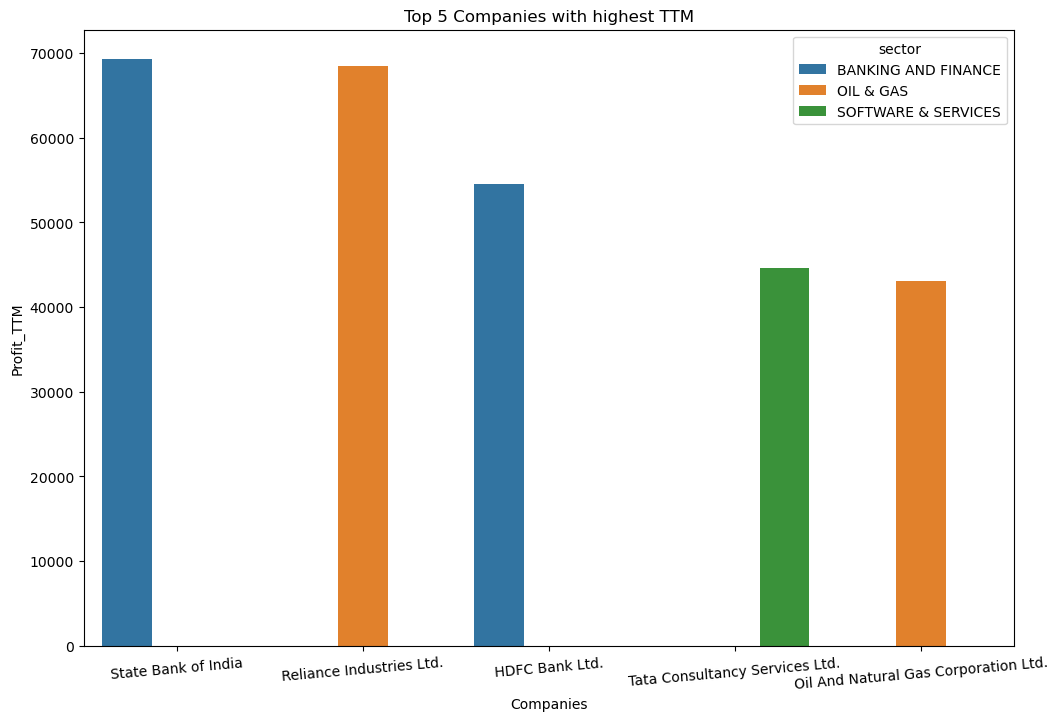

In [8]:
df_sorted = df.sort_values(by='profit_TTM', ascending=False)
top_5 = df_sorted.head(5)
plt.figure(figsize=(12,8))
sns.barplot(data=top_5, x='name', y='profit_TTM', hue='sector')
plt.xlabel('Companies')
plt.ylabel('Profit_TTM')
plt.xticks(rotation=5)
plt.title("Top 5 Companies with highest TTM")
plt.show()

The Trailing Twelve Months (TTM) profit is a financial metric that provides insight
into a company's financial performance over the past twelve months.
It is calculated by summing the profits or net income of a company over the most
recent four consecutive quarters.

**Few Inferences from the above barplot:-**
* SBI and Reliance have a profit_TTM of about 70000 crores.
* The Banking and Oil & Gas sector provide a good profit for the investors
* Government and Private Organizations have a good Profit_TTM.

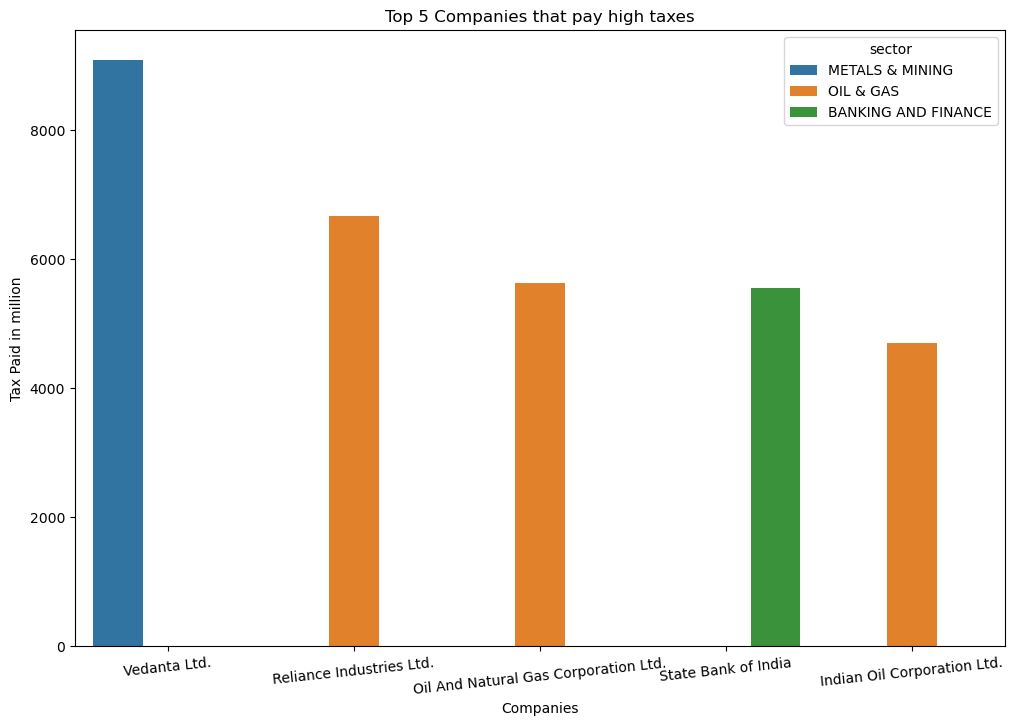

In [9]:
df_sorted = df.sort_values(by='tax', ascending=False)
top_5 = df_sorted.head(5)
plt.figure(figsize=(12,8))
sns.barplot(data=top_5, x='name', y='tax', hue='sector')
plt.xlabel('Companies')
plt.ylabel('Tax Paid in million')
plt.xticks(rotation=6)
plt.title("Top 5 Companies that pay high taxes")
plt.show()

In [10]:
name = 'Indian Oil Corporation Ltd.'

# Filter the DataFrame based on the company name
company_info = df[df['name'] == name]

# Display the information
if not company_info.empty:
    # Prints the values of all columns for the specified company
    for column, value in company_info.iloc[0].items():
        print(f"{column}: {value}")
else:
    print("No information found for", name)

name: Indian Oil Corporation Ltd.
NSE_code: IOC
BSE_code: 530965
sector: OIL & GAS
industry: OIL MARKETING & DISTRIBUTION
revenue: 179752.1
operating_expenses: 156013.1
operating_profit: 23328.4
operating_profit_margin: 13.01
depreciation: 3609.6
interest: 2135.0
profit_before_tax: 18090.2
tax: 4699.7
net_profit: 13114.3
EPS: 9.5
profit_TTM: 38614.3
EPS_TTM: 27.3


This code filters a DataFrame for the company,then prints the values of all columns for that company,
if information exists,
otherwise, it prints a message indicating no information found for the specified company.

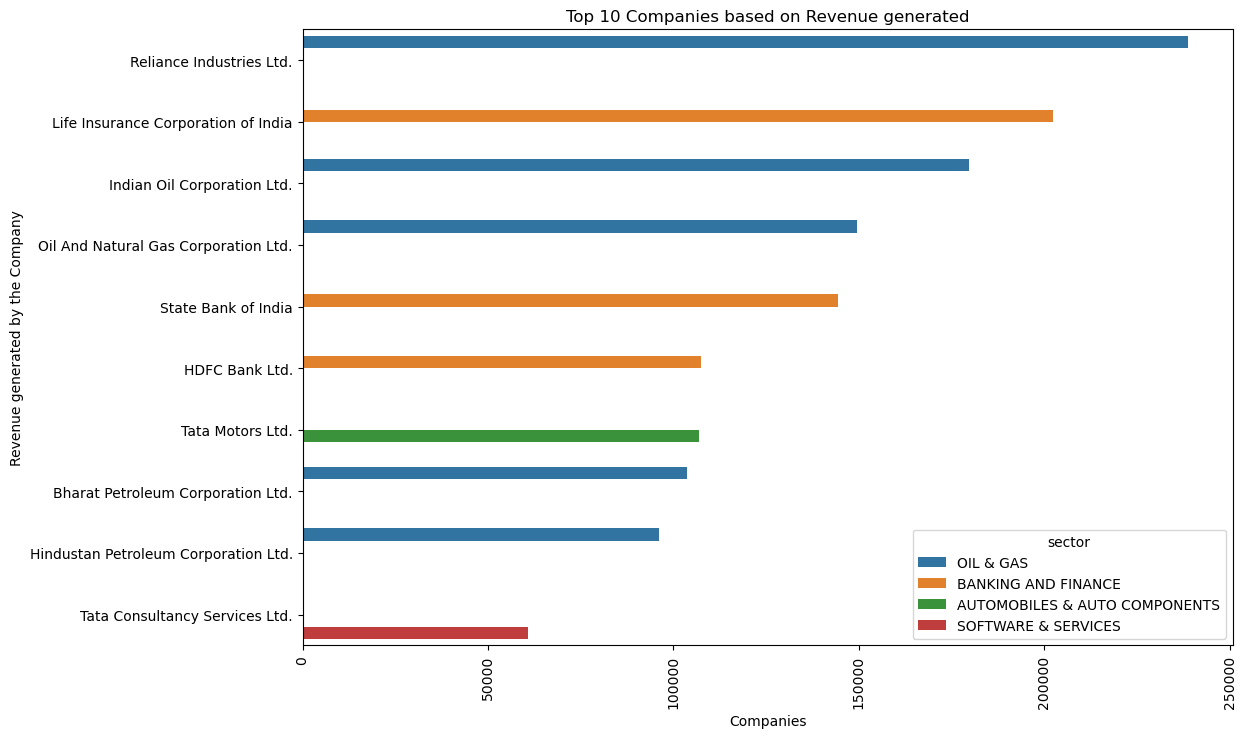

In [11]:
df_sorted = df.sort_values(by='revenue', ascending=False)
top_10 = df_sorted.head(10)
plt.figure(figsize=(12,8))
sns.barplot(data=top_10, x='revenue', y='name', hue='sector')
plt.xlabel('Companies')
plt.ylabel('Revenue generated by the Company')
plt.xticks(rotation=90)
plt.title("Top 10 Companies based on Revenue generated")
plt.show()

**Few Inferences from the above barplot:-**

* Oil and Gas sector which is owned by both private and government organizations
  are well profitable.
* 2nd majority of the revenue is by the Banking and Finance Sector which is 
  majorly from LIC and SBI which are government organizations.

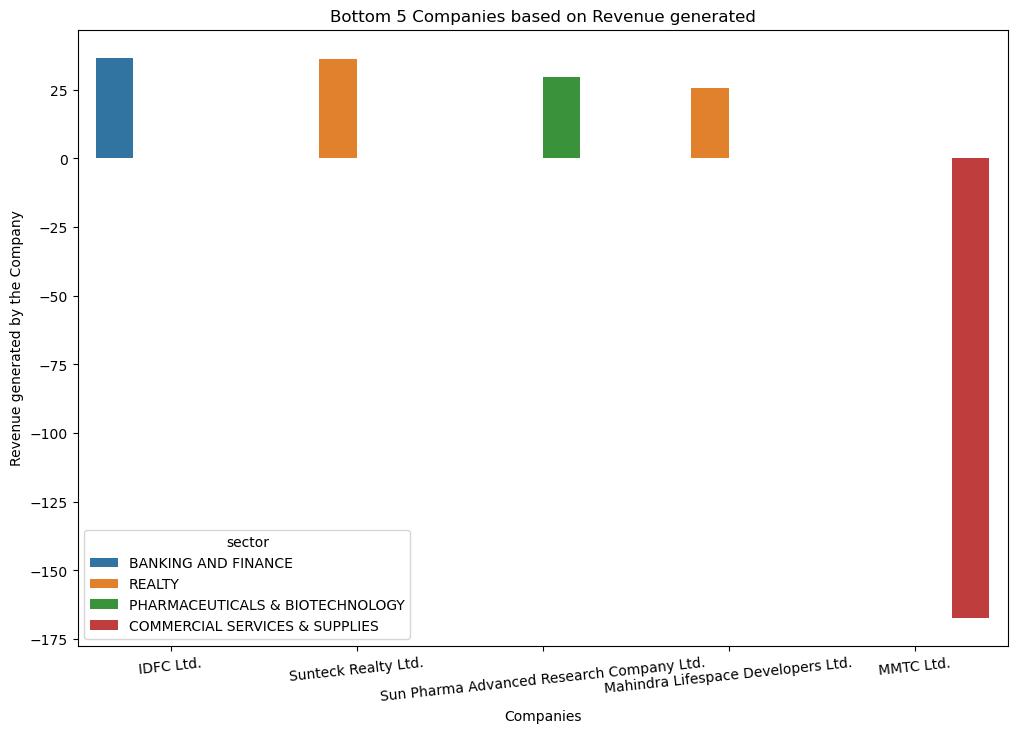

In [12]:
df_sorted = df.sort_values(by='revenue', ascending=False)
bottom_5 = df_sorted.tail(5)
plt.figure(figsize=(12,8))
sns.barplot(data=bottom_5, x='name', y='revenue', hue='sector')
plt.xlabel('Companies')
plt.ylabel('Revenue generated by the Company')
plt.xticks(rotation=6)
plt.title("Bottom 5 Companies based on Revenue generated")
plt.show()

We can see that **Realty,Commercial Sales,Pharmaceuticals** revenue is not that good.

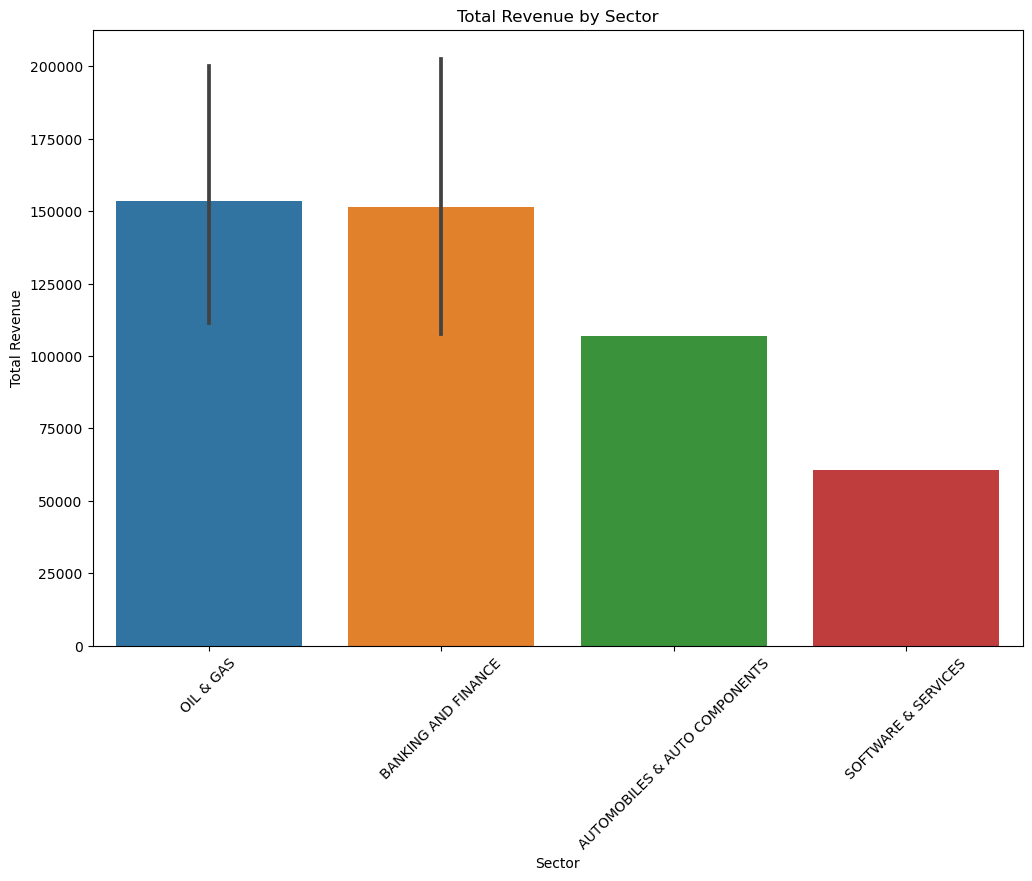

In [13]:
df_sorted = df.sort_values(by='revenue', ascending=False)
top_10 = df_sorted.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10, x='sector', y='revenue')
plt.xlabel('Sector')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Sector')
plt.xticks(rotation=45)
plt.show()

In [14]:
def treat_outliers(df, column_name):
    
    #Calculating IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = 0.75-0.25
    
    #Defining limits to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
     # Replacing the outliers with the lower and upper limits
    df[column_name] = df[column_name].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return df

This Python code defines a function, **treat_outliers, which takes a DataFrame (df)
and a column name (column_name) as input.** It aims to identify and handle outliers
in the specified column using the Interquartile Range (IQR) method.
The function calculates the first quartile (Q1), third quartile (Q3), and IQR.
Then, it establishes lower and upper bounds to identify outliers. **Finally,
it replaces outliers in the column with the respective lower or upper limit.**
This helps in mitigating the impact of extreme values on statistical analyses,
providing a more robust dataset for further exploration or modeling.

Text(0.5, 1.0, 'Revenue histogram with the kde line')

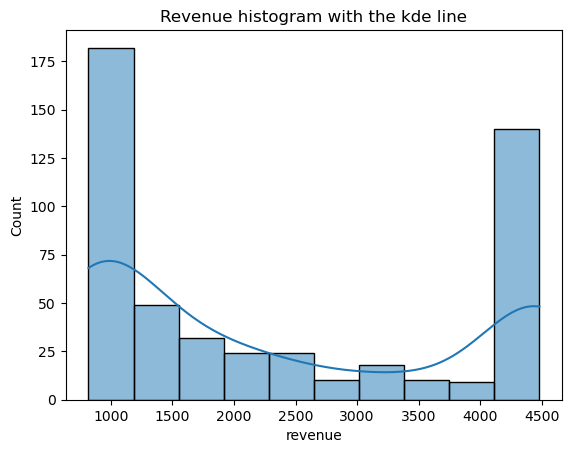

In [15]:
# creating a numeric dataframe
df_num = df.select_dtypes(include='float64')
df_treat = treat_outliers(df_num, 'revenue')
sns.histplot(df_treat['revenue'], kde=True)
plt.title('Revenue histogram with the kde line')

KDE allows us to **estimate the probability density function from our dataset.**

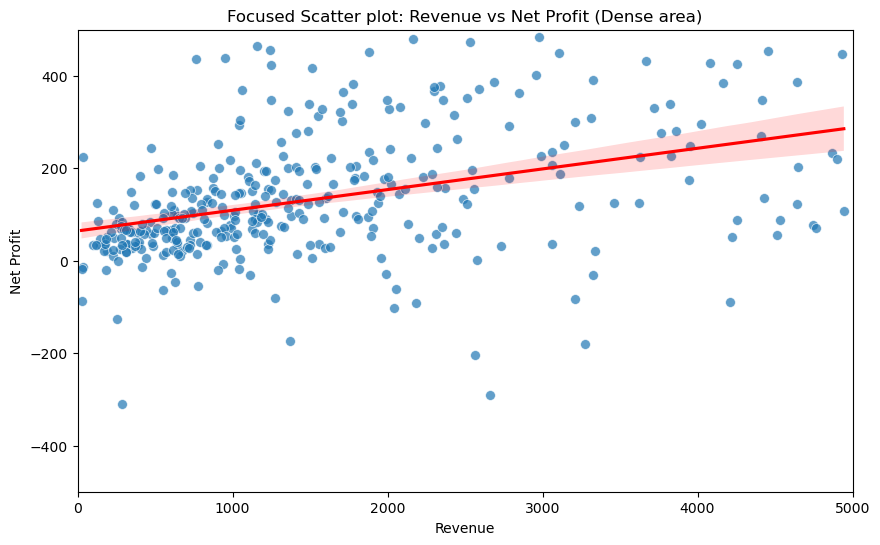

In [16]:
limit_revenue = (0, 5000)
limit_net_profit = (-500, 500)

data_focus = df[(df['revenue'] >= limit_revenue[0]) & 
                (df['revenue'] <= limit_revenue[1]) &
                (df['net_profit'] >= limit_net_profit[0]) &
                (df['net_profit'] <= limit_net_profit[1])] 

plt.figure(figsize=(10, 6))
sns.scatterplot(x='revenue', y='net_profit', data=data_focus, s=50, alpha=0.7)
sns.regplot(x='revenue', y='net_profit', data=data_focus, scatter=False, color='red')
plt.title('Focused Scatter plot: Revenue vs Net Profit (Dense area)')
plt.xlabel('Revenue')
plt.ylabel('Net Profit')
plt.xlim(limit_revenue)
plt.ylim(limit_net_profit)
plt.show()

The resulting data_focus DataFrame contains only the rows where both 'Revenue' and 'Net Profit'
values fall within the specified ranges, effectively focusing on a subset of data
within the defined limits for further analysis or visualization.

In summary, the graph provides insights into the relationship between 'Revenue' and 'Net Profit'
for a specific subset of data, with the regression line indicating the overall trend in that subset.
It allows for a visual assessment of how changes in 'Revenue' correspond to changes
in 'Net Profit' within the defined limits.

**The light red area indicates the confidence intervals**

It shows that a particular value may fall in this region
with a little bit of uncertainity.

In [17]:
df_corr = df_num.corr()
df_corr

,revenue,operating_expenses,operating_profit,operating_profit_margin,depreciation,interest,profit_before_tax,tax,net_profit,EPS,profit_TTM,EPS_TTM
revenue,1.000000,0.370246,0.443057,0.019816,0.293182,0.264764,0.388824,0.375987,0.366939,0.089819,0.389617,0.083849
operating_expenses,0.370246,1.000000,0.727229,-0.061274,0.634349,0.214094,0.723371,0.655553,0.691627,0.015207,0.722786,0.019792
operating_profit,0.443057,0.727229,1.000000,0.147915,0.705434,0.576551,0.915926,0.860037,0.854132,0.018158,0.872825,0.023871
operating_profit_margin,0.019816,-0.061274,0.147915,1.000000,0.032559,0.100520,0.084095,0.070960,0.083297,0.024897,0.083468,0.031863
depreciation,0.293182,0.634349,0.705434,0.032559,1.000000,0.087912,0.499965,0.579980,0.402683,0.003781,0.441429,0.007737
interest,0.264764,0.214094,0.576551,0.100520,0.087912,1.000000,0.594177,0.521927,0.602008,-0.004310,0.613002,-0.002303
profit_before_tax,0.388824,0.723371,0.915926,0.084095,0.499965,0.594177,1.000000,0.870677,0.973856,0.034216,0.969259,0.037924
tax,0.375987,0.655553,0.860037,0.070960,0.579980,0.521927,0.870677,1.000000,0.747511,0.019076,0.783593,0.023821
net_profit,0.366939,0.691627,0.854132,0.083297,0.402683,0.602008,0.973856,0.747511,1.000000,0.041556,0.980087,0.045572
EPS,0.089819,0.015207,0.018158,0.024897,0.003781,-0.004310,0.034216,0.019076,0.041556,1.000000,0.030909,0.989532


The code helps analyze the relationships and dependencies between numeric variables in
the DataFrame by calculating and displaying their correlation matrix.

In data analysis, correlation is widely used to understand the relationships between
different variables, identify patterns, and make predictions.
For example, in finance, it can be used to analyze the correlation between
the performance of different stocks. In healthcare,
it can help to understand the relationship between certain health indicators.

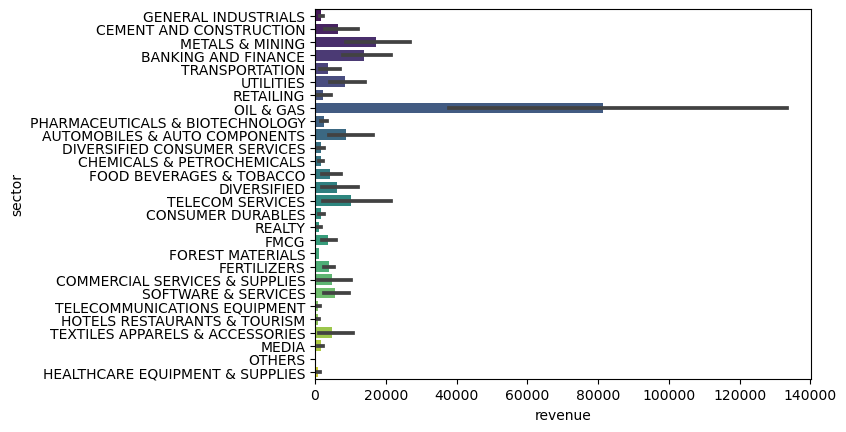

In [18]:
sns.barplot(data=df, x='revenue', y='sector', palette='viridis');

We can see that Oil and Gas Revenue is higher compared to others.

In [19]:
df_num.dtypes

revenue                    float64
operating_expenses         float64
operating_profit           float64
operating_profit_margin    float64
depreciation               float64
interest                   float64
profit_before_tax          float64
tax                        float64
net_profit                 float64
EPS                        float64
profit_TTM                 float64
EPS_TTM                    float64
dtype: object

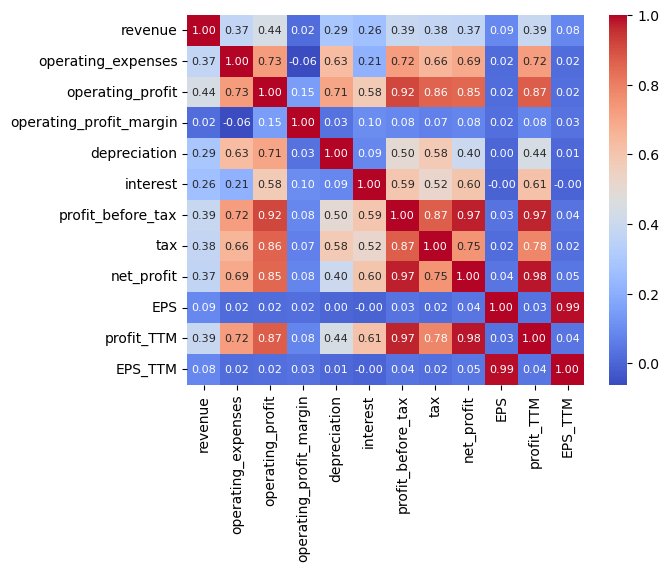

In [20]:
ax = sns.heatmap(data=df_corr,
                annot=True,
                annot_kws={'size':8},
                cmap='coolwarm',
                vmax= 1,
                fmt= '.2f')

ax = sns.heatmap(data=df_corr, ...):

Creates a heatmap using Seaborn's heatmap function.
The data parameter (df_corr) is the correlation matrix to be visualized.

**annot=True:**
Displays the correlation values in each cell of the heatmap.

**annot_kws={'size': 8}:**
Sets the size of the annotation text in each cell to 8.

**cmap='inferno':**
Specifies the color map for the heatmap. Here, it's set to 'inferno,' which is a perceptually uniform colormap.

**vmax=1 and vmin=-0.2:**
Sets the upper and lower limits of the color scale for the heatmap. Values outside this range are assigned the maximum or minimum color, respectively.

**fmt='.2f'**
:Formats the annotation text to display correlation values as floating-point
numbers with two decimal places.

In [21]:
corr_series = df_corr.unstack()
orr_series = corr_series.dropna().drop_duplicates()
corr_rank = corr_series.sort_values(ascending=False)
corr_rank = corr_rank[corr_rank < 1]
corr_rank.head()

EPS         EPS_TTM              0.989532
EPS_TTM     EPS                  0.989532
profit_TTM  net_profit           0.980087
net_profit  profit_TTM           0.980087
            profit_before_tax    0.973856
dtype: float64

**Transform the matrix into a one-dimensional series, and then checking which are the highest correlations,
except those that are corr=1**

These two variables **(Earnings Per Share and Earnings Per Share Trailing Twelve Months)** are
very strongly positively correlated with a correlation coefficient of approximately 0.989532.

**This implies that changes in one variable are highly predictive of changes in the other,
and they move almost in lockstep.**

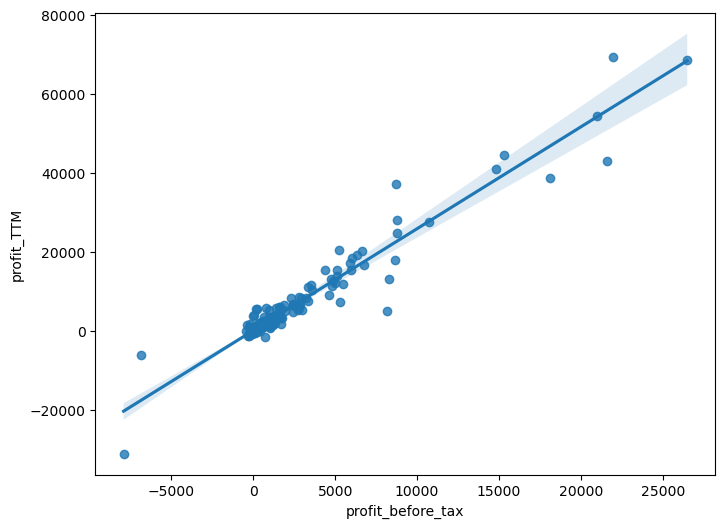

In [23]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_num, x='profit_before_tax', y='profit_TTM');

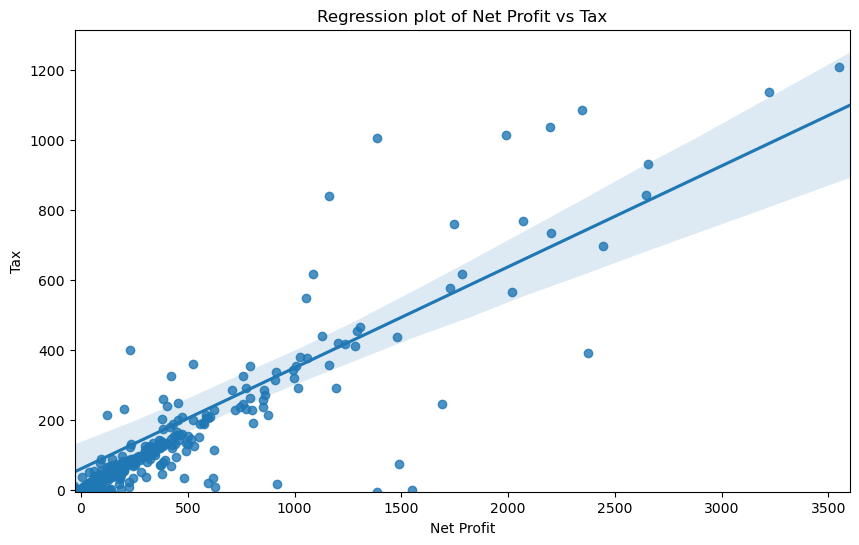

In [25]:
x_lower_limit = df_num['net_profit'].quantile(0.05)
x_upper_limit = df_num['net_profit'].quantile(0.95)
y_lower_limit = df_num['tax'].quantile(0.05)
y_upper_limit = df_num['tax'].quantile(0.95)

plt.figure(figsize=(10,6))
sns.regplot(data=df_num, x='net_profit', y='tax')
plt.xlim(x_lower_limit, x_upper_limit)
plt.ylim(y_lower_limit, y_upper_limit)
plt.title('Regression plot of Net Profit vs Tax')
plt.xlabel('Net Profit')
plt.ylabel('Tax')
plt.show()